In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [4]:
lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-180,180, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [5]:
coordinates = list(lats_lngs)
coordinates

[(-57.118570292161344, 36.63883537904525),
 (81.84452746702965, -7.352576786146841),
 (17.578198487187592, -97.30337055497402),
 (-80.73974791240155, -89.22677631232794),
 (-46.61362702083555, -131.05457223053511),
 (-62.222925478250886, 51.74829752348924),
 (84.45420284845741, -58.28438406216968),
 (-68.2432042607356, -23.106990574798488),
 (-70.15716332940971, 82.9812857617373),
 (-47.44373164086187, -98.35043722114831),
 (83.17456284918731, -50.8808910687101),
 (44.62040089699855, -69.37369918753028),
 (9.373939353028902, -10.833920152936741),
 (46.120249528459624, 62.560414770874246),
 (46.45895304616002, -113.96294567704673),
 (-55.90050995075129, 175.52623903715858),
 (-63.28777122477155, 156.41652982156342),
 (-35.57522223548938, -140.77891463610726),
 (30.32160684805936, -95.00903452738551),
 (-82.80577228175913, 129.90189350840728),
 (-79.55000571698926, -19.284633267472685),
 (-15.791660940563688, 4.000888104656468),
 (52.50163681817841, -129.1379484774817),
 (85.182500889040

In [6]:
from citipy import citipy

In [7]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities: 
        cities.append(city)
len(cities)

                    

608

In [8]:
import requests as req
from config import weather_api_key 

In [10]:
from datetime import datetime 

In [11]:
city_data = []
print('Beginning Data Retrieval    ')
print('----------------------------')


record_count = 1 
set_count = 1 

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    city_url = url + "&q=" + city.replace(" ", "+")
    
    
    print(f'Processing Record {record_count} of set {set_count} | {city}')
    record_count += 1
    try: 
        city_weather = req.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y - %m - %d %H:%M:%S')
        city_data.append({'City': city.title(),
                         'Country': city_country,
                         'Lat': city_lat,
                         'Lon': city_lon,
                         'Max Temp': city_max_temp,
                         'Wind': city_wind,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Date': city_date})   
    except: 
        
        print('City not found. Skipping...')
        
        pass
    
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of set 1 | port alfred
Processing Record 2 of set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of set 1 | asuncion nochixtlan
Processing Record 4 of set 1 | punta arenas
Processing Record 5 of set 1 | rikitea
Processing Record 6 of set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of set 1 | upernavik
Processing Record 8 of set 1 | mar del plata
Processing Record 9 of set 1 | busselton
Processing Record 10 of set 1 | castro
Processing Record 11 of set 1 | fairfield
Processing Record 12 of set 1 | seidu
Processing Record 13 of set 1 | kazalinsk
City not found. Skipping...
Processing Record 14 of set 1 | hamilton
Processing Record 15 of set 1 | kaitangata
Processing Record 16 of set 1 | bluff
Processing Record 17 of set 1 | liberty
Processing Record 18 of set 1 | new norfolk
Processing Record 19 of set 1 | ushuaia
Processing Record 20 of set 1 | namibe
Processing Record 21

Processing Record 37 of set 4 | severo-kurilsk
Processing Record 38 of set 4 | chuy
Processing Record 39 of set 4 | caibarien
Processing Record 40 of set 4 | souillac
Processing Record 41 of set 4 | nouadhibou
Processing Record 42 of set 4 | salalah
Processing Record 43 of set 4 | galiwinku
City not found. Skipping...
Processing Record 44 of set 4 | geraldton
Processing Record 45 of set 4 | labuhan
Processing Record 46 of set 4 | arraial do cabo
Processing Record 47 of set 4 | the valley
Processing Record 48 of set 4 | sept-iles
Processing Record 49 of set 4 | barentsburg
City not found. Skipping...
Processing Record 50 of set 4 | mayenne
Processing Record 1 of set 5 | craig
Processing Record 2 of set 5 | fort oglethorpe
Processing Record 3 of set 5 | baghdad
Processing Record 4 of set 5 | galesong
Processing Record 5 of set 5 | hambantota
Processing Record 6 of set 5 | panaba
Processing Record 7 of set 5 | faya
Processing Record 8 of set 5 | tura
Processing Record 9 of set 5 | avarua


Processing Record 28 of set 8 | vierzon
Processing Record 29 of set 8 | gurskoye
City not found. Skipping...
Processing Record 30 of set 8 | mys shmidta
City not found. Skipping...
Processing Record 31 of set 8 | martil
Processing Record 32 of set 8 | birecik
Processing Record 33 of set 8 | togitsu
Processing Record 34 of set 8 | deputatskiy
Processing Record 35 of set 8 | margate
Processing Record 36 of set 8 | challans
Processing Record 37 of set 8 | santa isabel
Processing Record 38 of set 8 | surgut
Processing Record 39 of set 8 | skelleftea
Processing Record 40 of set 8 | muisne
Processing Record 41 of set 8 | vila velha
Processing Record 42 of set 8 | tarudant
City not found. Skipping...
Processing Record 43 of set 8 | flin flon
Processing Record 44 of set 8 | sioux lookout
Processing Record 45 of set 8 | taoudenni
Processing Record 46 of set 8 | menemen
Processing Record 47 of set 8 | pombas
Processing Record 48 of set 8 | gomel
Processing Record 49 of set 8 | necochea
Processin

Processing Record 17 of set 12 | gayny
Processing Record 18 of set 12 | summerville
Processing Record 19 of set 12 | unai
Processing Record 20 of set 12 | flagstaff
Processing Record 21 of set 12 | vao
Processing Record 22 of set 12 | kavaratti
Processing Record 23 of set 12 | rapid valley
Processing Record 24 of set 12 | auki
Processing Record 25 of set 12 | crixas
Processing Record 26 of set 12 | abbeville
Processing Record 27 of set 12 | mezen
Processing Record 28 of set 12 | nizwa
Processing Record 29 of set 12 | obidos
Processing Record 30 of set 12 | livingstone
Processing Record 31 of set 12 | moindou
Processing Record 32 of set 12 | cervo
Processing Record 33 of set 12 | saint anthony
Processing Record 34 of set 12 | trelew
Processing Record 35 of set 12 | meyungs
City not found. Skipping...
Processing Record 36 of set 12 | sirnak
Processing Record 37 of set 12 | dickson
Processing Record 38 of set 12 | olinda
Processing Record 39 of set 12 | christchurch
Processing Record 40 o

In [12]:
print(len(city_data))

565


In [13]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Lat,Lon,Max Temp,Wind,Humidity,Cloudiness,Wind Speed,Date
0,Port Alfred,ZA,-33.5906,26.8910,55.17,7.09,53,0,7.09,2021 - 07 - 15 21:47:35
1,Asuncion Nochixtlan,MX,17.4667,-97.2333,65.14,8.21,75,97,8.21,2021 - 07 - 15 21:47:36
2,Punta Arenas,CL,-53.1500,-70.9167,39.31,5.75,93,90,5.75,2021 - 07 - 15 21:43:26
3,Rikitea,PF,-23.1203,-134.9692,73.31,8.05,72,11,8.05,2021 - 07 - 15 21:47:36
4,Upernavik,GL,72.7868,-56.1549,42.93,10.71,80,100,10.71,2021 - 07 - 15 21:47:37
5,Mar Del Plata,AR,-38.0023,-57.5575,51.87,1.99,66,0,1.99,2021 - 07 - 15 21:44:21
6,Busselton,AU,-33.6500,115.3333,53.10,11.59,75,98,11.59,2021 - 07 - 15 21:46:04
7,Castro,BR,-24.7911,-50.0119,62.51,4.27,59,100,4.27,2021 - 07 - 15 21:46:26
8,Fairfield,US,41.2668,-73.3162,88.52,1.01,70,1,1.01,2021 - 07 - 15 21:45:31
9,Seidu,SL,9.0167,-10.6000,68.36,3.40,99,93,3.40,2021 - 07 - 15 21:47:38


In [14]:
new_city_data_column = ['City', 'Country', 'Date', 'Lat', 'Lon', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']


In [15]:
city_data_df = city_data_df[new_city_data_column]
city_data_df

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2021 - 07 - 15 21:47:35,-33.5906,26.8910,55.17,53,0,7.09
1,Asuncion Nochixtlan,MX,2021 - 07 - 15 21:47:36,17.4667,-97.2333,65.14,75,97,8.21
2,Punta Arenas,CL,2021 - 07 - 15 21:43:26,-53.1500,-70.9167,39.31,93,90,5.75
3,Rikitea,PF,2021 - 07 - 15 21:47:36,-23.1203,-134.9692,73.31,72,11,8.05
4,Upernavik,GL,2021 - 07 - 15 21:47:37,72.7868,-56.1549,42.93,80,100,10.71
...,...,...,...,...,...,...,...,...,...
560,Ternate,ID,2021 - 07 - 15 21:50:45,0.8000,127.4000,79.50,83,92,3.67
561,Lakefield,US,2021 - 07 - 15 21:51:03,43.6775,-95.1717,80.08,61,1,4.61
562,Kajaani,FI,2021 - 07 - 15 21:51:04,64.2273,27.7285,66.25,94,0,6.91
563,San Jeronimo,PE,2021 - 07 - 15 21:51:04,-11.9472,-75.2829,60.31,49,26,7.65


In [25]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [26]:
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

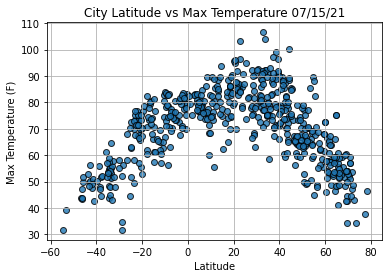

In [27]:
import time 

plt.scatter(lats, 
           max_temps,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Citites')

plt.title(f'City Latitude vs Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig1.png')

plt.show()

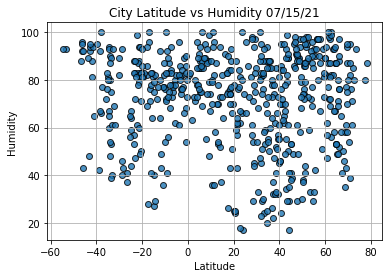

In [28]:
plt.scatter(lats,
           humidity,
           edgecolor = 'black', linewidth = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

plt.title(f'City Latitude vs Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig2.png')

plt.show()

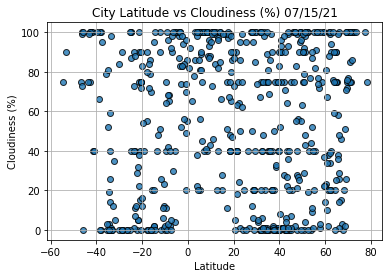

In [29]:
plt.scatter(lats,
           cloudiness,
           edgecolor = 'black', linewidth = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

plt.title(f'City Latitude vs Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig3.png')

plt.show()

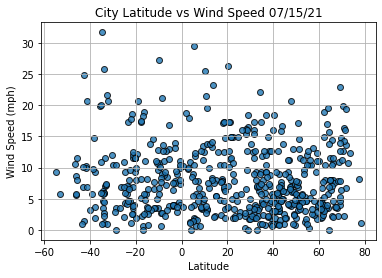

In [30]:
plt.scatter(lats,
           wind_speed,
           edgecolor = 'black', linewidth = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

plt.title(f'City Latitude vs Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig4.png')

plt.show()

In [42]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = slope * x_values + intercept 
    line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [43]:
index13 = city_data_df.loc[13]
index13

City                          Liberty
Country                            US
Date          2021 - 07 - 15 21:47:39
Lat                           31.8335
Lon                          -81.5004
Max Temp                        88.99
Humidity                           45
Cloudiness                         75
Wind Speed                       1.99
Name: 13, dtype: object

In [44]:
city_data_df['Lat'] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
560     True
561     True
562     True
563    False
564     True
Name: Lat, Length: 565, dtype: bool

In [45]:
nothern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

In [46]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2021 - 07 - 15 21:47:35,-33.5906,26.8910,55.17,53,0,7.09
2,Punta Arenas,CL,2021 - 07 - 15 21:43:26,-53.1500,-70.9167,39.31,93,90,5.75
3,Rikitea,PF,2021 - 07 - 15 21:47:36,-23.1203,-134.9692,73.31,72,11,8.05
5,Mar Del Plata,AR,2021 - 07 - 15 21:44:21,-38.0023,-57.5575,51.87,66,0,1.99
6,Busselton,AU,2021 - 07 - 15 21:46:04,-33.6500,115.3333,53.10,75,98,11.59


In [47]:
nothern_hemi_df.head()

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
1,Asuncion Nochixtlan,MX,2021 - 07 - 15 21:47:36,17.4667,-97.2333,65.14,75,97,8.21
4,Upernavik,GL,2021 - 07 - 15 21:47:37,72.7868,-56.1549,42.93,80,100,10.71
8,Fairfield,US,2021 - 07 - 15 21:45:31,41.2668,-73.3162,88.52,70,1,1.01
9,Seidu,SL,2021 - 07 - 15 21:47:38,9.0167,-10.6000,68.36,99,93,3.40
10,Hamilton,US,2021 - 07 - 15 21:44:55,39.1834,-84.5333,90.95,57,40,1.99


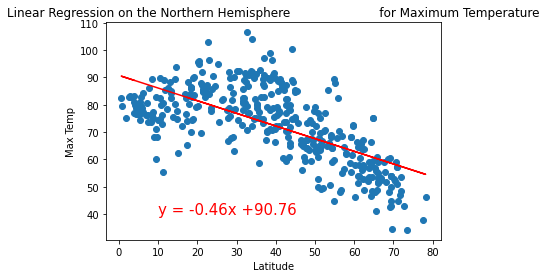

LinregressResult(slope=-0.46327257574967756, intercept=90.76314268548771, rvalue=-0.6671750832756365, pvalue=1.4317051494728535e-51, stderr=0.026259075525407304, intercept_stderr=1.1416164723045865)

In [70]:
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature','Max Temp', (10,40))
linregress(x_values, y_values)

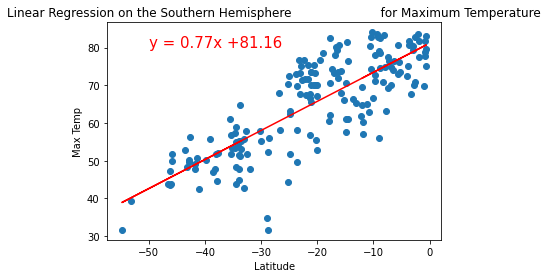

LinregressResult(slope=0.7707260489113281, intercept=81.1640336297293, rvalue=0.8104730961618626, pvalue=4.895628512058684e-42, stderr=0.04235160317256813, intercept_stderr=1.0482506052439418)

In [66]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (-50,80))
linregress(x_values, y_values)

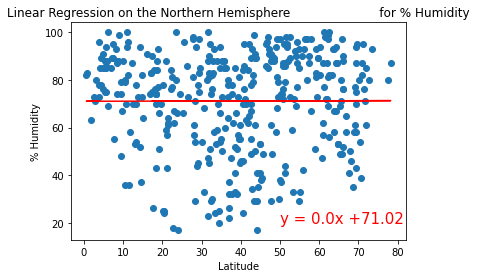

LinregressResult(slope=0.0033537793608515785, intercept=71.01880004272472, rvalue=0.003208166279480439, pvalue=0.949644666464821, stderr=0.05307127486681939, intercept_stderr=2.3072800691533732)

In [72]:
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity','% Humidity', (50,20))
linregress(x_values, y_values)

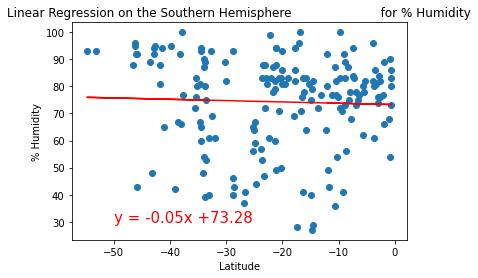

LinregressResult(slope=-0.048938475938322484, intercept=73.28442372197358, rvalue=-0.03790679232961745, pvalue=0.6184522486638372, stderr=0.09808398539858196, intercept_stderr=2.427690792243671)

In [74]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                      for % Humidity', '% Humidity', (-50,30))
linregress(x_values, y_values)

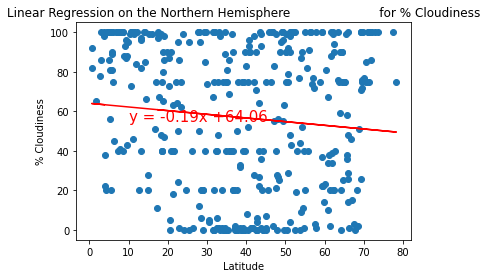

LinregressResult(slope=-0.18571977664651898, intercept=64.0559069298681, rvalue=-0.09861183323065127, pvalue=0.05166412510152214, stderr=0.09514617194246043, intercept_stderr=4.136491288931334)

In [77]:
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness','% Cloudiness', (10,55))
linregress(x_values, y_values)

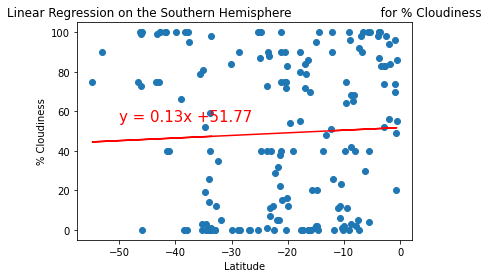

LinregressResult(slope=0.1321722578872699, intercept=51.77171613182215, rvalue=0.045061481720684644, pvalue=0.5537593204132976, stderr=0.22277703296106927, intercept_stderr=5.51398629903931)

In [79]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (-50,55))
linregress(x_values, y_values)

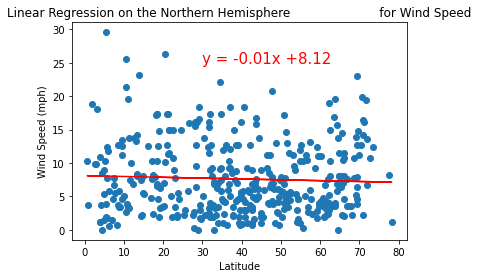

LinregressResult(slope=-0.01248689270292637, intercept=8.119329659699467, rvalue=-0.046101268814702785, pvalue=0.36388476898535715, stderr=0.013736106164585085, intercept_stderr=0.5971788705067779)

In [84]:
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed','Wind Speed (mph)', (30,25))
linregress(x_values, y_values)

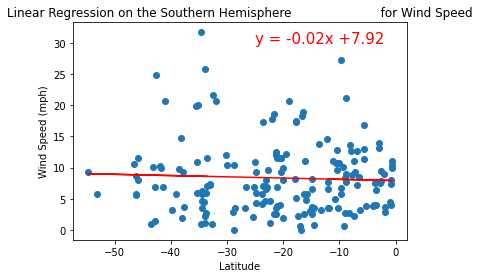

LinregressResult(slope=-0.020104938483935686, intercept=7.923087503284897, rvalue=-0.04644858367117398, pvalue=0.5416080552174855, stderr=0.03287291571569629, intercept_stderr=0.8136422523299296)

In [90]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed (mph)', (-25,30))
linregress(x_values, y_values)